GPT-2 (Generative Pre-trained Transformer 2) là một mô hình ngôn ngữ tự động mạnh mẽ do OpenAI phát triển. Đây là một trong những mô hình ngôn ngữ đầu tiên đạt được khả năng sinh ngữ cảnh và văn bản chất lượng cao mà không cần huấn luyện lại trên dữ liệu đặc biệt. GPT-2 có thể được sử dụng cho nhiều nhiệm vụ xử lý ngôn ngữ tự nhiên (NLP) như tạo văn bản, dịch ngôn ngữ, tóm tắt văn bản, và nhiều hơn nữa.

- GPT2Tokenizer: Được sử dụng để mã hóa văn bản thành các token số học mà mô hình có thể hiểu. Nó cũng có khả năng giải mã các token trở lại văn bản.
- GPT2Model: Đây là mô hình GPT-2 không có đầu ra sinh văn bản (head) dành cho các nhiệm vụ như sinh ngôn ngữ hoặc phân loại. Nó trả về các hidden states từ các lớp của Transformer.
- GPT2LMHeadModel: Mô hình GPT-2 với đầu ra đặc biệt giúp dự đoán từ tiếp theo, cho phép sinh văn bản.
- generate(): Phương thức này của mô hình cho phép sinh văn bản dựa trên đầu vào ban đầu. Các tham số như max_length và num_return_sequences có thể được điều chỉnh để kiểm soát độ dài và số lượng chuỗi văn bản được sinh.

In [ ]:
# !pip install transformers

In [5]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Tải tokenizer và model của GPT-2
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Văn bản đầu vào
input_text = "Once upon a time in a land far away, there was a beautiful kingdom where"

# Mã hóa văn bản đầu vào thành các token
inputs = tokenizer.encode(input_text, return_tensors='pt')

# Tạo attention mask (ở đây tất cả các token đều là từ chính)
attention_mask = torch.ones(inputs.shape, dtype=torch.long)

# Sinh văn bản
outputs = model.generate(inputs, 
                         max_length=100, 
                         num_return_sequences=1, 
                         attention_mask=attention_mask, 
                         pad_token_id=tokenizer.eos_token_id)

# Giải mã các token thành văn bản
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(generated_text)


Once upon a time in a land far away, there was a beautiful kingdom where the gods were worshipped. The gods were called the gods of the land, and they were called the gods of the land. The gods were called the gods of the land because they were the gods of the land. The gods were called the gods of the land because they were the gods of the land. The gods were called the gods of the land because they were the gods of the land. The gods were called the


In [6]:
import json
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from transformers import GPT2Tokenizer, GPT2Model

In [7]:
# def process_file_fixed(file_path):
#     news = []
#     with open(file_path, 'r') as file:
#         for i, line in enumerate(file):
            
#             json_object = json.loads(line)
#             news.append(json_object)
#     return news

# file_path = 'dataset/News_Category_Dataset_v3.json'
# news = process_file_fixed(file_path)
# print(len(news))

209527


In [8]:
def process_file_fixed(file_path, num_rows=21000):
    news = []
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i >= num_rows:
                break
            json_object = json.loads(line)
            news.append(json_object)
    return news

file_path = 'dataset/News_Category_Dataset_v3.json'
news = process_file_fixed(file_path, num_rows=21000)
print(len(news))

21000


In [12]:
news[45]

{'link': 'https://www.huffpost.com/entry/alex-aster-lightlark-culture-shifters_n_630d2145e4b065bfc4b12692',
 'headline': 'Meet Alex Aster, The TikToker Changing The Publishing Industry For The Better',
 'category': 'CULTURE & ARTS',
 'short_description': 'The Colombian-American author\'s new book "Lightlark" was rejected numerous times — until she went directly to her readers for support.',
 'authors': 'Marilyn La Jeunesse',
 'date': '2022-09-15'}

In [23]:
from collections import Counter
num_rows=21000
articles=[]
# Đọc dữ liệu từ tệp
with open(file_path, 'r', encoding='utf-8') as f:

    for i,line in enumerate(f):
        if i>=21000:
            break
        article= json.loads(line)
        articles.append(article)
# Lấy danh sách tất cả các category
categories = [article.get('category') for article in articles]

# Đếm số lượng các danh mục khác nhau
category_counts = Counter(categories)

# Hiển thị kết quả
for category, count in category_counts.items():
    print(f"{category}: {count}")

# Tổng số lượng danh mục khác nhau
print(f"Tổng số lượng danh mục khác nhau: {len(category_counts)}")


U.S. NEWS: 1377
COMEDY: 835
PARENTING: 114
WORLD NEWS: 1982
CULTURE & ARTS: 44
TECH: 104
SPORTS: 602
ENTERTAINMENT: 3510
POLITICS: 7284
WEIRD NEWS: 408
ENVIRONMENT: 121
EDUCATION: 70
CRIME: 397
SCIENCE: 76
WELLNESS: 118
BUSINESS: 198
STYLE & BEAUTY: 165
FOOD & DRINK: 114
MEDIA: 535
QUEER VOICES: 657
HOME & LIVING: 125
WOMEN: 444
BLACK VOICES: 561
TRAVEL: 111
MONEY: 49
RELIGION: 123
LATINO VOICES: 127
IMPACT: 152
WEDDINGS: 2
COLLEGE: 3
PARENTS: 121
ARTS & CULTURE: 47
STYLE: 132
GREEN: 110
TASTE: 62
HEALTHY LIVING: 120
Tổng số lượng danh mục khác nhau: 36


In [13]:
text_cat_pairs = []

for news_item in news:
    headline = news_item.get("headline")
    short_description = news_item.get("short_description")
    text = headline + " || " + short_description
    category = news_item.get("category")
    text_cat_pairs.append((text, category))

text_cat_pairs[5]

('Cleaner Was Dead In Belk Bathroom For 4 Days Before Body Found: Police || The 63-year-old woman was seen working at the South Carolina store on Thursday. She was found dead Monday after her family reported her missing, authorities said.',
 'U.S. NEWS')

In [31]:
text_cat_pairs[0]

('Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters || Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.',
 'U.S. NEWS')

In [24]:
# Create dictionaries to encode and decode category labels
label_to_index = {}  # Map category to index
index_to_label = {}  # Map index to category
i = 0  # Start index at 0

# Populate the dictionaries with unique categories
for (_, label) in text_cat_pairs:
    if label not in label_to_index:  # If the label is not yet added
        label_to_index[label] = i  # Assign it the next index
        index_to_label[i] = label  # Map the index back to the label
        i += 1  # Increment the index


In [25]:
label_to_index

{'U.S. NEWS': 0,
 'COMEDY': 1,
 'PARENTING': 2,
 'WORLD NEWS': 3,
 'CULTURE & ARTS': 4,
 'TECH': 5,
 'SPORTS': 6,
 'ENTERTAINMENT': 7,
 'POLITICS': 8,
 'WEIRD NEWS': 9,
 'ENVIRONMENT': 10,
 'EDUCATION': 11,
 'CRIME': 12,
 'SCIENCE': 13,
 'WELLNESS': 14,
 'BUSINESS': 15,
 'STYLE & BEAUTY': 16,
 'FOOD & DRINK': 17,
 'MEDIA': 18,
 'QUEER VOICES': 19,
 'HOME & LIVING': 20,
 'WOMEN': 21,
 'BLACK VOICES': 22,
 'TRAVEL': 23,
 'MONEY': 24,
 'RELIGION': 25,
 'LATINO VOICES': 26,
 'IMPACT': 27,
 'WEDDINGS': 28,
 'COLLEGE': 29,
 'PARENTS': 30,
 'ARTS & CULTURE': 31,
 'STYLE': 32,
 'GREEN': 33,
 'TASTE': 34,
 'HEALTHY LIVING': 35}

In [26]:
index_to_label

{0: 'U.S. NEWS',
 1: 'COMEDY',
 2: 'PARENTING',
 3: 'WORLD NEWS',
 4: 'CULTURE & ARTS',
 5: 'TECH',
 6: 'SPORTS',
 7: 'ENTERTAINMENT',
 8: 'POLITICS',
 9: 'WEIRD NEWS',
 10: 'ENVIRONMENT',
 11: 'EDUCATION',
 12: 'CRIME',
 13: 'SCIENCE',
 14: 'WELLNESS',
 15: 'BUSINESS',
 16: 'STYLE & BEAUTY',
 17: 'FOOD & DRINK',
 18: 'MEDIA',
 19: 'QUEER VOICES',
 20: 'HOME & LIVING',
 21: 'WOMEN',
 22: 'BLACK VOICES',
 23: 'TRAVEL',
 24: 'MONEY',
 25: 'RELIGION',
 26: 'LATINO VOICES',
 27: 'IMPACT',
 28: 'WEDDINGS',
 29: 'COLLEGE',
 30: 'PARENTS',
 31: 'ARTS & CULTURE',
 32: 'STYLE',
 33: 'GREEN',
 34: 'TASTE',
 35: 'HEALTHY LIVING'}

In [34]:
# Function to convert a label to its corresponding tensor representation
def convert_labels(label):
    return torch.tensor(label_to_index[label])  # Convert label to its encoded index

# Convert all labels into tensors
labels = [cat for (text, cat) in text_cat_pairs]  # Extract categories
labels = [convert_labels(label) for label in labels]  # Convert each label to a tensor
print(labels)
stacked_tensors_y = torch.stack(labels).long()  # Combine all label tensors into one
stacked_tensors_y


[tensor(0), tensor(0), tensor(1), tensor(2), tensor(0), tensor(0), tensor(0), tensor(3), tensor(4), tensor(3), tensor(3), tensor(3), tensor(3), tensor(5), tensor(0), tensor(3), tensor(4), tensor(6), tensor(3), tensor(3), tensor(7), tensor(8), tensor(3), tensor(0), tensor(8), tensor(0), tensor(6), tensor(3), tensor(7), tensor(9), tensor(8), tensor(0), tensor(10), tensor(3), tensor(10), tensor(10), tensor(3), tensor(10), tensor(9), tensor(7), tensor(8), tensor(0), tensor(0), tensor(7), tensor(8), tensor(4), tensor(0), tensor(7), tensor(7), tensor(7), tensor(7), tensor(3), tensor(7), tensor(0), tensor(8), tensor(5), tensor(0), tensor(7), tensor(0), tensor(8), tensor(8), tensor(6), tensor(6), tensor(8), tensor(8), tensor(4), tensor(4), tensor(6), tensor(0), tensor(8), tensor(0), tensor(3), tensor(0), tensor(8), tensor(7), tensor(3), tensor(10), tensor(3), tensor(7), tensor(7), tensor(3), tensor(7), tensor(3), tensor(8), tensor(7), tensor(7), tensor(8), tensor(8), tensor(3), tensor(6), tens

tensor([ 0,  0,  1,  ...,  8, 35,  8])

In [28]:
stacked_tensors_y.shape

torch.Size([21000])

1. Padding là gì trong NLP?
- Padding là quá trình thêm các token đặc biệt vào cuối (hoặc đầu) của một chuỗi văn bản sao cho tất cả các chuỗi trong một batch có độ dài giống nhau. Trong hầu hết các mô hình NLP, đặc biệt là các mô hình Transformer, chiều dài của chuỗi đầu vào cần phải đồng nhất. Padding giúp đạt được điều này.

- Padding token là một token đặc biệt mà mô hình sẽ không chú ý đến trong quá trình tính toán (thường có giá trị là 0 hoặc một token đặc biệt như <PAD>).
2. Padding trong Xử lý Chuỗi (NLP):

- Trong xử lý chuỗi, padding được sử dụng để chuẩn hóa độ dài của các chuỗi văn bản (các câu hoặc đoạn văn) sao cho chúng có kích thước đồng nhất, đặc biệt khi bạn sử dụng các mô hình học sâu như RNN, LSTM, Transformer, v.v.

- Trong NLP, padding không phải là số 0 mà là một token đặc biệt (thường là [PAD], hoặc số 0 có thể được sử dụng nhưng đại diện cho một token đặc biệt) được thêm vào cuối hoặc đầu của các câu. Token padding này giúp mô hình nhận biết rằng vị trí đó không chứa thông tin hữu ích và có thể bị bỏ qua trong quá trình huấn luyện.

In [35]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2') #tải tokenizer của gpt-2
embedding_model = GPT2Model.from_pretrained('gpt2').to('cuda')
tokenizer.pad_token = tokenizer.eos_token  # Set padding token to <|endoftext|>, đây là một token cuối văn bản(eos_token or end of sequence token)

In [38]:
ex = text_cat_pairs[4][0]
ex

'Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer || Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.'

In [40]:
tokens = tokenizer.encode(ex) # chuyển đổi một chuỗi văn bản (trong biến ex) thành danh sách các token IDs (mã số của các token trong từ điển của tokenizer).
print(tokens)
print([tokenizer.decode([t]) for t in tokens]) #chuyển một token ID (hoặc một danh sách các token IDs) trở lại thành từ gốc trong văn bản

[48081, 5338, 34099, 327, 2840, 1550, 2619, 14506, 12, 54, 34734, 406, 4629, 3854, 6063, 12914, 1475, 12, 29733, 263, 8614, 14235, 10382, 5371, 4896, 4081, 14021, 10857, 1122, 286, 30750, 9645, 607, 290, 24150, 607, 257, 9811, 706, 2008, 286, 262, 5694, 3250, 8791, 1816, 14416, 13]
['Woman', ' Who', ' Called', ' C', 'ops', ' On', ' Black', ' Bird', '-', 'W', 'atcher', ' L', 'oses', ' Law', 'suit', ' Against', ' Ex', '-', 'Employ', 'er', ' ||', ' Amy', ' Cooper', ' accused', ' investment', ' firm', ' Franklin', ' Temple', 'ton', ' of', ' unfairly', ' firing', ' her', ' and', ' branding', ' her', ' a', ' racist', ' after', ' video', ' of', ' the', ' Central', ' Park', ' encounter', ' went', ' viral', '.']


```padding=True```: Mô hình sẽ tự động thêm padding vào các chuỗi ngắn hơn. \
```truncation=True```: Nếu chuỗi quá dài, mô hình sẽ cắt bớt. \
```return_tensors='pt'```: Đảm bảo đầu ra là tensor của PyTorch, có thể được sử dụng trong mô hình.

In [48]:
# Function to embed a single sentence using GPT-2
def embed_sentence(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to('cuda')  # Tokenize and encode
    with torch.no_grad():  # Disable gradient computation
        outputs = embedding_model(**inputs)  # Forward pass through GPT-2
    hidden_states = outputs.last_hidden_state  # Extract hidden states
    sentence_embedding = hidden_states.mean(dim=1)  # Compute sentence embedding via mean pooling
    return sentence_embedding


In [49]:
len(tokens)

48

In [50]:
embedded_example = embed_sentence(ex)
embedded_example.shape

torch.Size([1, 768])

In [51]:
embedded_sentences = [embed_sentence(text) for (text, cat) in text_cat_pairs]
print(embedded_sentences[-1].shape)

torch.Size([1, 768])


In [52]:
len(embedded_sentences)

21000

In [56]:
max_len = max([x.shape[0] for x in embedded_sentences])

# Pad the shorter sentences with zeros
padded_sentences = []
for sentence in embedded_sentences:
  padding_length = max_len - sentence.shape[0]
  if padding_length == 0:
    padded_sentences.append(sentence)
  else:
    padding = torch.zeros(padding_length, sentence.shape[1])
    padded_sentence = torch.cat((sentence, padding), dim=0)
    padded_sentences.append(padded_sentence)

# Stack the padded tensors
stacked_tensors_x = torch.stack(padded_sentences)
stacked_tensors_x.shape

torch.Size([21000, 1, 768])

In [57]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    stacked_tensors_x, stacked_tensors_y, test_size=0.2, random_state=42)

In [58]:
val_texts, test_texts, val_labels, test_labels = train_test_split(
    val_texts, val_labels, test_size=0.5, random_state=42)

- input_size: Kích thước của vector đầu vào tại mỗi bước thời gian.
- hidden_size: Số lượng đơn vị (neurons) trong mỗi lớp ẩn của LSTM.
- num_layers: Số lượng lớp LSTM.
- num_classes: Số lượng lớp đầu ra (sử dụng trong tác vụ phân loại).

In [157]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes,dropout=0.5):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size 
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # 2 for bidirection
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Get the device of the input tensor
        device = x.device

        # Set initial hidden and cell states on the same device as x
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)  # 2 for bidirection
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size*2)

        # Apply dropout to the output of LSTM
        out = self.dropout(out)  # Apply dropout to the LSTM output
        
        # Decode the hidden state of the last time step
        last_hidden = self.fc(out[:, -1, :])  # Last time step
        first_hidden = self.fc(out[:, 0, :])  # First time step
        output = last_hidden + first_hidden
        return output


In [158]:
embedding_dimensionality = stacked_tensors_x.shape[-1]
num_classes = len(label_to_index)
embedding_dimensionality, num_classes

(768, 36)

In [159]:
embedding_dimensionality = stacked_tensors_x.shape[-1]
num_classes = len(label_to_index)
input_size = embedding_dimensionality
# hidden_size = embedding_dimensionality
hidden_size = 1280
num_layers = 1
model = LSTM(input_size, hidden_size, num_layers, num_classes).to('cuda')

In [109]:
output = model(stacked_tensors_x.to('cuda'))
output.shape

torch.Size([21000, 36])

In [160]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.005)

In [125]:
from torchviz import make_dot
from IPython.display import Image

# Giả sử input của bạn có kích thước (batch_size=1, seq_len=50, input_size=100)
dummy_input = torch.randn(1, 50, 768).to('cuda')
output = model(dummy_input)

# Tạo và hiển thị đồ thị tính toán
make_dot(output, params=dict(model.named_parameters())).render("model_visualization", format="svg")

# Image("model_visualization.svg")



'model_visualization.svg'

In [89]:
from PIL import Image

# Mở file PNG
img = Image.open("model_visualization.png")

# Đặt DPI và lưu lại với chất lượng cao hơn
img.save("model_visualization_high_res.png", dpi=(500, 500))


In [162]:
def train_model(model, train_texts, train_labels, val_texts, val_labels, epochs, optimizer, criterion):
    train_loss_history, val_loss_history = [], []
    train_acc_history, val_acc_history = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        outputs = model(train_texts.to('cuda'))
        loss = criterion(outputs, train_labels.to('cuda'))
        train_loss_history.append(loss.item())
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        train_acc = (preds == train_labels.to('cuda')).float().mean().item()
        train_acc_history.append(train_acc)

        model.eval()
        with torch.no_grad():
            val_outputs = model(val_texts.to('cuda'))
            val_loss = criterion(val_outputs, val_labels.to('cuda'))
            val_loss_history.append(val_loss.item())

            _, val_preds = torch.max(val_outputs, 1)
            val_acc = (val_preds == val_labels.to('cuda')).float().mean().item()
            val_acc_history.append(val_acc)

        print(f"Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, "
              f"Val Loss: {val_loss.item():.4f}, Val Acc: {val_acc:.4f}")
        
        torch.cuda.empty_cache()

    return train_loss_history, val_loss_history, train_acc_history, val_acc_history

In [163]:
epochs = 300
train_loss, val_loss, train_acc, val_acc = train_model(
    model, train_texts, train_labels, val_texts, val_labels, epochs, optimizer, criterion)


Epoch 1/300 - Train Loss: 3.7297, Train Acc: 0.0186, Val Loss: 7.6006, Val Acc: 0.3333
Epoch 2/300 - Train Loss: 7.2847, Train Acc: 0.3486, Val Loss: 7.2594, Val Acc: 0.1710
Epoch 3/300 - Train Loss: 7.0893, Train Acc: 0.1661, Val Loss: 7.6159, Val Acc: 0.0900
Epoch 4/300 - Train Loss: 7.4959, Train Acc: 0.0946, Val Loss: 6.1781, Val Acc: 0.0386
Epoch 5/300 - Train Loss: 6.0958, Train Acc: 0.0310, Val Loss: 4.0378, Val Acc: 0.0200
Epoch 6/300 - Train Loss: 4.0048, Train Acc: 0.0298, Val Loss: 3.4484, Val Acc: 0.3333
Epoch 7/300 - Train Loss: 3.4587, Train Acc: 0.2896, Val Loss: 3.3830, Val Acc: 0.3333
Epoch 8/300 - Train Loss: 3.3832, Train Acc: 0.3486, Val Loss: 3.3284, Val Acc: 0.3333
Epoch 9/300 - Train Loss: 3.3309, Train Acc: 0.3486, Val Loss: 3.0448, Val Acc: 0.3333
Epoch 10/300 - Train Loss: 3.0764, Train Acc: 0.3489, Val Loss: 2.9161, Val Acc: 0.4719
Epoch 11/300 - Train Loss: 2.9546, Train Acc: 0.3823, Val Loss: 2.9273, Val Acc: 0.1714
Epoch 12/300 - Train Loss: 2.9568, Train 

In [164]:
def plot_metrics(train_history, val_history, metric_name):
    plt.figure(figsize=(8, 5))
    plt.plot(train_history, label=f'Train {metric_name}')
    plt.plot(val_history, label=f'Validation {metric_name}')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} over Epochs')
    plt.legend()
    plt.show()

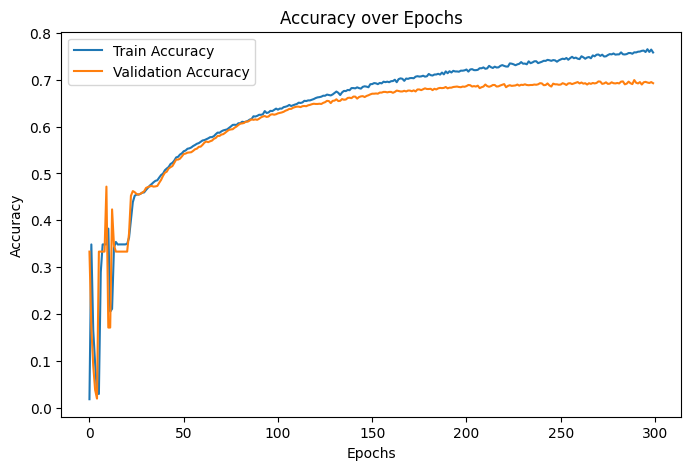

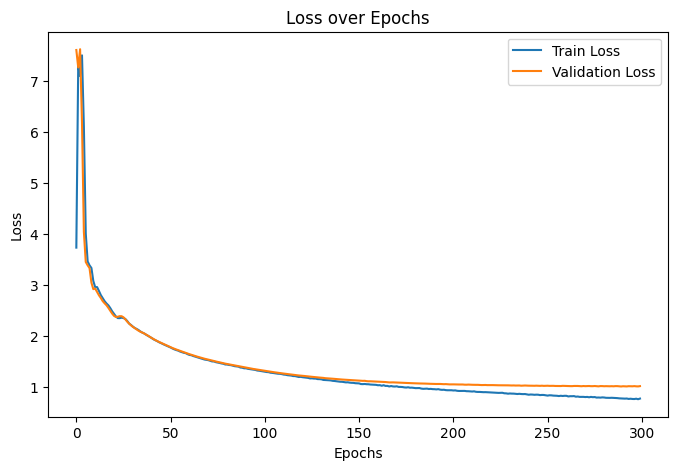

In [165]:
plot_metrics(train_acc, val_acc, "Accuracy")
plot_metrics(train_loss, val_loss, "Loss")

In [166]:
def evaluate_model(model, test_texts, test_labels):
    model.eval()
    with torch.no_grad():
        test_outputs = model(test_texts.to('cuda'))
        _, test_preds = torch.max(test_outputs, 1)

    test_labels = test_labels.cpu().numpy()
    test_preds = test_preds.cpu().numpy()

    precision = precision_score(test_labels, test_preds, average='weighted')
    recall = recall_score(test_labels, test_preds, average='weighted')
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")

In [167]:
evaluate_model(model, test_texts, test_labels)

Precision: 0.6756, Recall: 0.6886


c:\Users\Admin\miniconda3\envs\pytorchdl\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [168]:
class LSTMAttention(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes,dropout=0.5):
        super(LSTMAttention, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                            batch_first=True, bidirectional=True)
        # Define the attention mechanism
        self.attention = nn.Linear(hidden_size * 2, 1)  # 2 for bidirectional
        self.fc = nn.Linear(hidden_size * 2, num_classes)
        self.dropout = nn.Dropout(dropout)
    def forward(self, x):
        # Initialize hidden and cell states
        device = x.device
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)

        # LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Attention mechanism
        # Compute attention weights
        attn_weights = torch.softmax(self.attention(out), dim=1)  # Shape: [batch_size, seq_len, 1]
        attn_output = torch.sum(attn_weights * out, dim=1)  # Weighted sum of hidden states
        attn_output = self.dropout(attn_output)
        # Fully connected layer
        output = self.fc(attn_output)
        return output


In [172]:
import torch.nn.functional as F

class ScaledDotProductAttention(nn.Module):
    def __init__(self, hidden_size):
        super(ScaledDotProductAttention, self).__init__()
        self.hidden_size = hidden_size
        
    def forward(self, Q, K, V):
        # Compute scaled dot-product attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.hidden_size, dtype=torch.float32))
        attn_weights = F.softmax(scores, dim=-1)
        output = torch.matmul(attn_weights, V)
        return output, attn_weights
    

class LSTMAttention1(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes,dropout=0.5):
        super(LSTMAttention1, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM Layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                            batch_first=True, bidirectional=True)
        
        # Dropout layer
        self.dropout = nn.Dropout(dropout)

        # Attention mechanism
        self.attention = ScaledDotProductAttention(hidden_size * 2)  # 2 for bidirectional
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        device = x.device
        
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)

        # LSTM forward pass
        out, (hn, cn) = self.lstm(x, (h0, c0))
        
        # Apply dropout
        out = self.dropout(out)

        # Prepare Q, K, V for attention
        Q = out  # Query
        K = out  # Key
        V = out  # Value
        
        # Apply attention mechanism
        attn_output, attn_weights = self.attention(Q, K, V)
        attn_output = torch.sum(attn_output, dim=1)  # Weighted sum of hidden states
        # attn_output = self.dropout(attn_output)

        # Fully connected layer
        output = self.fc(attn_output)
        
        return output

Epoch 1/300 - Train Loss: 3.6540, Train Acc: 0.0182, Val Loss: 4.1048, Val Acc: 0.3333
Epoch 2/300 - Train Loss: 3.9327, Train Acc: 0.3486, Val Loss: 3.9395, Val Acc: 0.1710
Epoch 3/300 - Train Loss: 3.8463, Train Acc: 0.1704, Val Loss: 3.1427, Val Acc: 0.1710
Epoch 4/300 - Train Loss: 3.0862, Train Acc: 0.1671, Val Loss: 2.7846, Val Acc: 0.3714
Epoch 5/300 - Train Loss: 2.7528, Train Acc: 0.2318, Val Loss: 2.6329, Val Acc: 0.3333
Epoch 6/300 - Train Loss: 2.6056, Train Acc: 0.3486, Val Loss: 2.5671, Val Acc: 0.3333
Epoch 7/300 - Train Loss: 2.5337, Train Acc: 0.3486, Val Loss: 2.5666, Val Acc: 0.3333
Epoch 8/300 - Train Loss: 2.5274, Train Acc: 0.3486, Val Loss: 2.5175, Val Acc: 0.3333
Epoch 9/300 - Train Loss: 2.4789, Train Acc: 0.3486, Val Loss: 2.4682, Val Acc: 0.3333
Epoch 10/300 - Train Loss: 2.4274, Train Acc: 0.3489, Val Loss: 2.4612, Val Acc: 0.3333
Epoch 11/300 - Train Loss: 2.4184, Train Acc: 0.3774, Val Loss: 2.4666, Val Acc: 0.4462
Epoch 12/300 - Train Loss: 2.4206, Train 

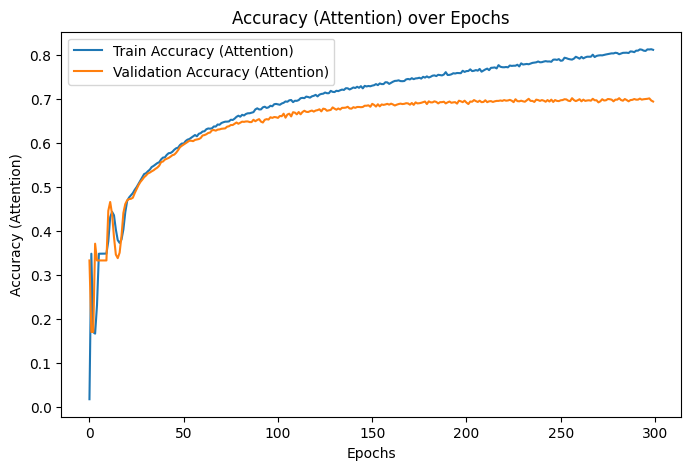

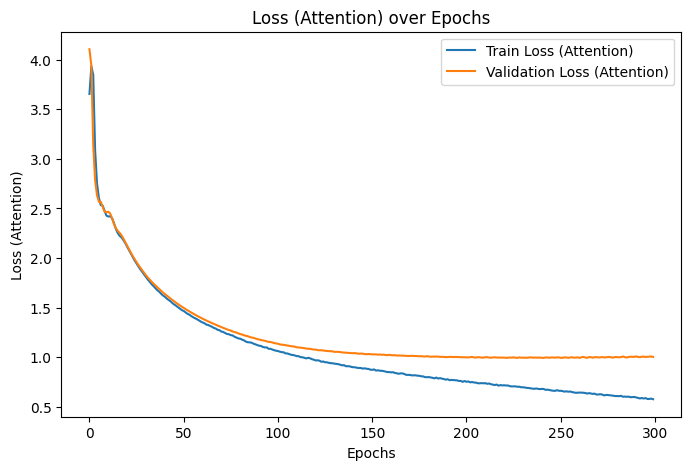

In [156]:
# Initialize and train the LSTMAttention model
epochs=300
attention_model = LSTMAttention(input_size, hidden_size, num_layers, num_classes).to('cuda')

attention_optimizer = optim.AdamW(attention_model.parameters(), lr=0.005)
attention_train_loss, attention_val_loss, attention_train_acc, attention_val_acc = train_model(
    attention_model, train_texts, train_labels, val_texts, val_labels, epochs, attention_optimizer, criterion)

plot_metrics(attention_train_acc, attention_val_acc, "Accuracy (Attention)")
plot_metrics(attention_train_loss, attention_val_loss, "Loss (Attention)")


Epoch 1/300 - Train Loss: 3.6065, Train Acc: 0.0340, Val Loss: 3.8111, Val Acc: 0.3333
Epoch 2/300 - Train Loss: 3.6330, Train Acc: 0.3486, Val Loss: 3.9944, Val Acc: 0.1710
Epoch 3/300 - Train Loss: 3.8812, Train Acc: 0.1662, Val Loss: 3.5121, Val Acc: 0.0686
Epoch 4/300 - Train Loss: 3.4374, Train Acc: 0.0838, Val Loss: 2.8203, Val Acc: 0.1924
Epoch 5/300 - Train Loss: 2.7737, Train Acc: 0.1727, Val Loss: 2.6113, Val Acc: 0.3333
Epoch 6/300 - Train Loss: 2.5758, Train Acc: 0.3486, Val Loss: 2.6215, Val Acc: 0.3333
Epoch 7/300 - Train Loss: 2.5850, Train Acc: 0.3486, Val Loss: 2.6513, Val Acc: 0.3333
Epoch 8/300 - Train Loss: 2.6070, Train Acc: 0.3486, Val Loss: 2.5970, Val Acc: 0.3333
Epoch 9/300 - Train Loss: 2.5515, Train Acc: 0.3486, Val Loss: 2.5413, Val Acc: 0.3333
Epoch 10/300 - Train Loss: 2.4942, Train Acc: 0.3489, Val Loss: 2.5410, Val Acc: 0.3338
Epoch 11/300 - Train Loss: 2.4877, Train Acc: 0.3825, Val Loss: 2.5429, Val Acc: 0.4690
Epoch 12/300 - Train Loss: 2.4917, Train 

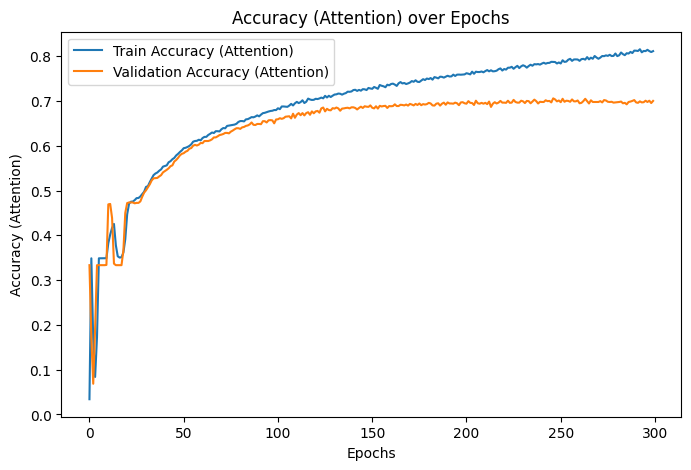

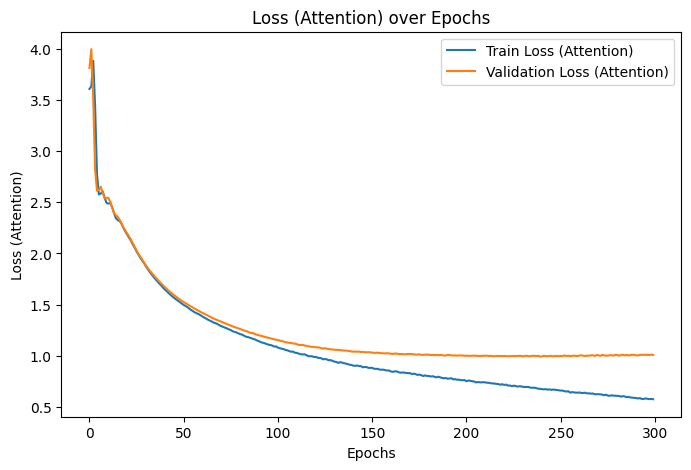

In [173]:
# Initialize and train the LSTMAttention model
epochs=300
attention_model_scaled_product = LSTMAttention1(input_size, hidden_size, num_layers, num_classes).to('cuda')

attention_optimizer = optim.AdamW(attention_model_scaled_product.parameters(), lr=0.005)
attention_train_loss, attention_val_loss, attention_train_acc, attention_val_acc = train_model(
    attention_model_scaled_product, train_texts, train_labels, val_texts, val_labels, epochs, attention_optimizer, criterion)

plot_metrics(attention_train_acc, attention_val_acc, "Accuracy (Attention)")
plot_metrics(attention_train_loss, attention_val_loss, "Loss (Attention)")


In [174]:
def evaluate_per_class(model, test_texts, test_labels, index_to_label):
    model.eval()
    with torch.no_grad():
        test_outputs = model(test_texts.to('cuda'))
        _, test_preds = torch.max(test_outputs, 1)

    test_labels = test_labels.cpu().numpy()
    test_preds = test_preds.cpu().numpy()

    precision = precision_score(test_labels, test_preds, average=None)
    recall = recall_score(test_labels, test_preds, average=None)

    for i, label in index_to_label.items():
        print(f"Class {label}: Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}")


In [176]:
print("LSTM Performance:")
evaluate_per_class(model, test_texts, test_labels, index_to_label)

print("\nLSTM with Attention Performance:")
evaluate_per_class(attention_model_scaled_product, test_texts, test_labels, index_to_label)


LSTM Performance:
Class U.S. NEWS: Precision: 0.4015, Recall: 0.4240
Class COMEDY: Precision: 0.6812, Recall: 0.5529
Class PARENTING: Precision: 0.7143, Recall: 0.6250
Class WORLD NEWS: Precision: 0.7864, Recall: 0.7941
Class CULTURE & ARTS: Precision: 1.0000, Recall: 0.1667
Class TECH: Precision: 0.2857, Recall: 0.1538
Class SPORTS: Precision: 0.5882, Recall: 0.6557
Class ENTERTAINMENT: Precision: 0.7029, Recall: 0.8611
Class POLITICS: Precision: 0.7763, Recall: 0.8927
Class WEIRD NEWS: Precision: 0.3871, Recall: 0.3000
Class ENVIRONMENT: Precision: 0.5714, Recall: 0.3333
Class EDUCATION: Precision: 0.3333, Recall: 0.1667
Class CRIME: Precision: 0.6316, Recall: 0.3243
Class SCIENCE: Precision: 0.4000, Recall: 0.2857
Class WELLNESS: Precision: 0.5556, Recall: 0.4167
Class BUSINESS: Precision: 0.4286, Recall: 0.1667
Class STYLE & BEAUTY: Precision: 0.8235, Recall: 0.7000
Class FOOD & DRINK: Precision: 0.6667, Recall: 0.6000
Class MEDIA: Precision: 0.4375, Recall: 0.3043
Class QUEER VOIC

c:\Users\Admin\miniconda3\envs\pytorchdl\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\miniconda3\envs\pytorchdl\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [178]:
def predict_category(text, model, tokenizer, index_to_label):
    model.eval()
    with torch.no_grad():
        embedded_text = embed_sentence(text).to('cuda')
        output = model(embedded_text.unsqueeze(0))  # Add batch dimension
        _, prediction = torch.max(output, 1)
    return index_to_label[prediction.item()]

user_input = "Breaking news: AI is transforming industries worldwide!"
predicted_category = predict_category(user_input, attention_model_scaled_product, tokenizer, index_to_label)
print(f"Predicted Category: {predicted_category}")


Predicted Category: WORLD NEWS


In [179]:
def analyze_errors(model, test_texts, test_labels, text_cat_pairs, index_to_label):
    model.eval()
    with torch.no_grad():
        test_outputs = model(test_texts.to('cuda'))
        _, test_preds = torch.max(test_outputs, 1)

    test_labels = test_labels.cpu().numpy()
    test_preds = test_preds.cpu().numpy()

    errors = (test_preds != test_labels)
    for idx, error in enumerate(errors):
        if error:
            print(f"Text: {text_cat_pairs[idx][0]}")
            print(f"True Label: {index_to_label[test_labels[idx]]}")
            print(f"Predicted Label: {index_to_label[test_preds[idx]]}")
            print("-" * 50)


In [181]:
print("LSTM Errors:")
analyze_errors(model, test_texts, test_labels, text_cat_pairs, index_to_label)

print("\nLSTM with Attention Errors:")
analyze_errors(attention_model_scaled_product, test_texts, test_labels, text_cat_pairs, index_to_label)


LSTM Errors:
Text: Reporter Gets Adorable Surprise From Her Boyfriend While Live On TV || "Who's that behind you?" an anchor for New York’s PIX11 asked journalist Michelle Ross as she finished up an interview.
True Label: POLITICS
Predicted Label: U.S. NEWS
--------------------------------------------------
Text: How A New Documentary Captures The Complexity Of Being A Child Of Immigrants || In "Mija," director Isabel Castro combined music documentaries with the style of "Euphoria" and "Clueless" to tell a more nuanced immigration story.
True Label: ENTERTAINMENT
Predicted Label: POLITICS
--------------------------------------------------
Text: Virginia Thomas Agrees To Interview With Jan. 6 Panel || Conservative activist Virginia Thomas, the wife of Supreme Court Justice Clarence Thomas, has agreed to participate in a voluntary interview with the House panel investigating the Jan. 6 insurrection.
True Label: BLACK VOICES
Predicted Label: ENTERTAINMENT
---------------------------------

In [182]:
torch.save(attention_model_scaled_product,"attention_model_scaled_product.pth")